<font size="5"><strong><center>PROJECT - 3<center></strong></font>
    
<font size="4"><font color="red"><strong><center>Image Classification: Dog vs Cat<center></strong></font>

<b>Introduction</b>

In this project, the different images of Dogs and Cats will be preprocessed using techniques such as Resizing, Gray Scaling, Smoothing, Normalizing and also by applying Dimensionality Reduction (PCA). 

The image will then be trained using classifiers such as SVM (Support Vector Machines) and KNN (K-Nearest Neighbors) algorithms with HyperTuned parameters.

Finally, a set of unseen images will be predicted by the final classifier which shows highest accuracy.

<b>Imports</b>

In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from cv2 import imread, cvtColor, COLOR_BGR2GRAY, resize, GaussianBlur, normalize, NORM_MINMAX
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

<b>Setting Up Directories</b>

In [2]:
os.chdir('D://Notes - Canvas//Semester-2//Applied Machine Learning//Project-3//Project3_files//Project3_files//data')
train_dir = 'train//'

<b>Functions</b>

In [3]:
# To read the image from the directory
def to_read_image(file):
    image = imread(file)
    return image

# To show the image
def display_one(original, title1 = "Original"):
    plt.imshow(original), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.show()

# To show two images adjacent to one another for comparison
def display(original, modified, title1 = "Before", title2 = "After"):
    plt.subplot(121), plt.imshow(original), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(modified), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

# Converts image from RGB to Gray
def color_to_gray(image):
    image = cvtColor(image, COLOR_BGR2GRAY)
    return image

# Resizes the image to defined size
def resize_image(image, size):
    image = resize(image, size)
    return image

# To smoothen the image using Gaussian Filter
def blur_image(image):
    image = GaussianBlur(image, (5,5), 0)
    return image

# To normalize the image
def normalizing_image(image):
    image = normalize(image, np.zeros((800,800)), 0, 255, NORM_MINMAX)
    return image

# Converts a 3D array to a 2D Array
def threeDim_to_twoDim(matrix):
    size = len(matrix)
    twoDim_matrix = matrix.reshape(size, -1)
    return twoDim_matrix

In [4]:
# SVM Model HyperParameter Tuning
def SVM_HyperParameter_Tuning(pca_train, train_label):
    param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
    grid = GridSearchCV(SVC(), param_grid, refit = True)
  
    #Fitting the model for grid search 
    grid.fit(train_img, train_label) 
    
    return grid.best_params_

In [5]:
# KNN Model HyperParameter Tuning
def KNN_HyperParameter_Tuning(pca_train, train_label):
    #List Hyperparameters that we want to tune.
    n_neighbors = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
    
    #Convert to dictionary
    hyperparameters = dict(n_neighbors=n_neighbors)
    
    #Create new KNN object
    knn = KNeighborsClassifier()
    
    #Use GridSearch
    clf = GridSearchCV(knn, hyperparameters, cv=10)
    
    #Fit the model
    best_model = clf.fit(pca_train, train_label)
    
    return best_model.best_estimator_.get_params()['n_neighbors']

<b>Visualizing Image PreProcessing</b>

********* Image Classification - Dog vs Cat Identification  ********



********  Visualizations before and after Image Processing  ********


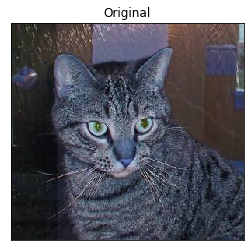

Shape of the Image:  (280, 300, 3)



       Applying Gray Scale to the Image       


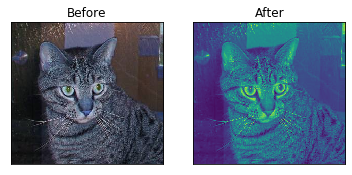




              Resizing the Image              


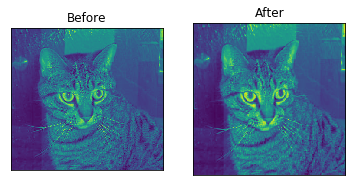

Resized Shape of the Image:  (200, 200)



              Smoothing the Image             


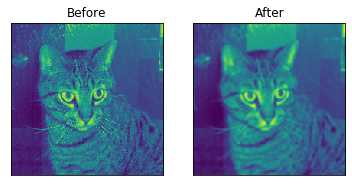




             Normalizing the Image            


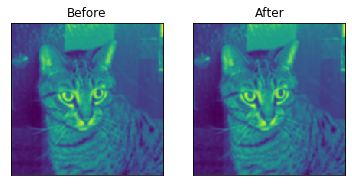

In [6]:
print("********* Image Classification - Dog vs Cat Identification  ********")
print("\n\n")
print("********  Visualizations before and after Image Processing  ********")
# Imports the first file from the Directory
file = os.listdir(train_dir)[1]
original_image = to_read_image(os.path.join(train_dir, file))
display_one(original_image)
print("Shape of the Image: ", original_image.shape)
gray_image = color_to_gray(original_image)
print("\n")
print()
print("       Applying Gray Scale to the Image       ")
display(original_image, gray_image)
resized_image = resize_image(gray_image, (200, 200))
print("\n")
print()
print("              Resizing the Image              ")
display(gray_image, resized_image)
print("Resized Shape of the Image: ", resized_image.shape)
blurred_image = blur_image(resized_image)
print("\n")
print()
print("              Smoothing the Image             ")
display(resized_image, blurred_image)
normalized_image = normalizing_image(blurred_image)
print("\n")
print()
print("             Normalizing the Image            ")
display(blurred_image, normalized_image)

<b> Data Processing and Preparation </b>

In [7]:
data_path = os.path.join(train_dir,'*g')
files = glob.glob(data_path)
# Resizing Dimension
size = (200, 200)
image_matrix, labels = list(), list()

# Iterating through each file in the train directory
for file in files:
    output = 0
    if file.startswith('train\dog'):
        output = 1
    original_image = to_read_image(file)
    gray_image = color_to_gray(original_image)
    resized_image = resize_image(gray_image, size)
    blurred_image = blur_image(resized_image)
    normalized_image = normalizing_image(blurred_image)
    image_final = np.asarray(normalized_image)
    image_matrix.append(image_final)
    labels.append(output)

# Image values and labels stored as an array
image_matrix = np.asarray(image_matrix)
labels = np.asarray(labels)

# To load data faster
np.save('Matrix.npy', image_matrix)
np.save('Labels.npy', labels)

# Converts 3D to 2D for PCA implementation
matrix_2D = threeDim_to_twoDim(image_matrix)

# Preparing the data for training and testing
(train_img, test_img, train_label, test_label) = train_test_split(matrix_2D, labels, test_size=0.2, random_state=866)


# Principal Component Analysis
pca = PCA(n_components = 0.8, svd_solver = 'full')
pca_train = pca.fit_transform(train_img)
pca_test  = pca.transform(test_img)

<b>HyperParameter Optimization</b>

In [8]:
## The following block of code is used for HyperTuning the parameters for both SVM and KNN Models
## The HyperTuning functions run for about 2 hours to get the best parameters search - SVM
## So, the below code for SVM Hypertuning is commented
## Kindly uncomment to check the HyperTuning results for SVM Model

# ####### HYPERPARAMETER OPTIMIZATION #######

# ###### SVM MODEL - HYPERTUNING - PCA ######
# best_params = SVM_HyperParameter_Tuning(pca_train, train_label)
# print("Best CV Parameters for SVM - PCA: ", best_params)
# # Returns {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

# ###### KNN MODEL - HYPERTUNING - PCA ######
best_k_pca = KNN_HyperParameter_Tuning(pca_train, train_label)
print("Best CV k value - PCA: ", best_k_pca)

# ###### SVM MODEL - HYPERTUNING ######
# best_params = SVM_HyperParameter_Tuning(train_img, train_label)
# print("Best CV Parameters for SVM: ", best_params)
# # Returns {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

# ###### KNN MODEL - HYPERTUNING ######
best_k = KNN_HyperParameter_Tuning(train_img, train_label)
print("Best CV k value: ", best_k)

Best CV k value - PCA:  15
Best CV k value:  5


<b>Model Selection - SVM vs KNN</b>

In [9]:
### Takes 2 hours to train the model ###
# Kindly uncomment to train the model for SVM - PCA

# # SVM - PCA Model Train & Validation
# svm_model_pca = SVC(max_iter=-1, kernel='linear', class_weight='balanced',gamma=1, C=0.1)  # 'linear' kerner was better here
# svm_model_pca.fit(pca_train, train_label)
# accuracy_svm_pca = svm_model.score(pca_test, test_label)
# print("SVM - PCA Model Accuracy: {:.2f}%".format(accuracy_svm_pca * 100))

In [10]:
# KNN - PCA MODEL Train & Validation
knn_model_pca = KNeighborsClassifier(n_neighbors=best_k_pca, n_jobs=-1)
knn_model_pca.fit(pca_train, train_label)
accuracy_knn_pca = knn_model_pca.score(pca_test, test_label)
print("KNN - PCA Model Accuracy: {:.2f}%".format(accuracy_knn_pca * 100))

KNN - PCA Model Accuracy: 55.22%


In [11]:
# SVM Model Train & Validation
svm_model = SVC(max_iter=-1, kernel='linear', class_weight='balanced',gamma=1, C=0.1)  # 'linear' kerner was better here
svm_model.fit(train_img, train_label)
accuracy_svm = svm_model.score(test_img, test_label)
print("SVM Model Accuracy: {:.2f}%".format(accuracy_svm * 100))

SVM Model Accuracy: 47.26%


In [12]:
# KNN MODEL Train & Validation
knn_model = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
knn_model.fit(train_img, train_label)
accuracy_knn = knn_model.score(test_img, test_label)
print("KNN Model Accuracy: {:.2f}%".format(accuracy_knn * 100))

KNN Model Accuracy: 50.75%


The KNN Model using Principal Component Analysis for Dimesionality Reduction is chosen as the best model among all the trained models. 

It shows an accuracy of 55.22 %, which means out of 10 Images, 5 or 6 Images are correctly classified.

<b> Image Prediction </b>

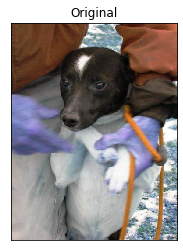

Prediction by KNN-PCA Model:  Cat


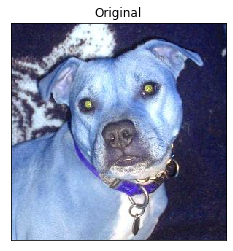

Prediction by KNN-PCA Model:  Dog


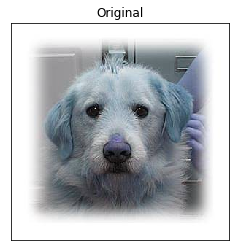

Prediction by KNN-PCA Model:  Dog


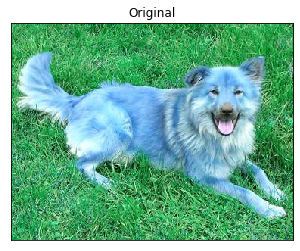

Prediction by KNN-PCA Model:  Dog


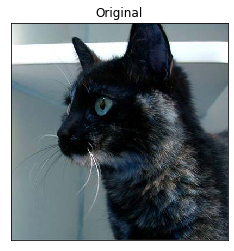

Prediction by KNN-PCA Model:  Cat


In [22]:
os.chdir('..//test')
# Iterating through first 10 images from test directory for predictions
for i in range(1,6):
    original_image = to_read_image("{0}.jpg".format(i))
    display_one(original_image)
    gray_image = color_to_gray(original_image)
    resized_image = resize_image(gray_image, size)
    blurred_image = blur_image(resized_image)
    normalized_image = normalizing_image(blurred_image)
    image_final = np.asarray(normalized_image)
    
    ## The matrix is converted from 2D to 3D and vice versa for proper processing
    twoDim_to_threeDim = image_final[np.newaxis, :, :]
    
    matrix_2D_test = threeDim_to_twoDim(twoDim_to_threeDim)
    
    pca_test_data = pca.transform(matrix_2D_test)
    
    prediction = knn_model_pca.predict(pca_test_data)
    
    if prediction[0]==1:
        classification = "Dog"
    else:
        classification = "Cat"
    
    print("Prediction by KNN-PCA Model: ", classification)